In [1]:
import glob

pos_review = (glob.glob("/Users/ian/Desktop/Study/data/imdb/train/pos/*.txt"))[0:100]
lines_pos = []
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

len(lines_pos)

100

In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import pandas as pd

tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
count = {}
for line in lines_pos:
    words = line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if i not in stop_words + ["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b:
                count[b,a] = count.get((b,a),0)+1
            else:
                count[a,b] = count.get((a,b),0)+1

df = pd.DataFrame.from_dict(count, orient='index')

list1 = []
for i in range(len(df)):
    list1.append([df.index[i][0], df.index[i][1], df[0][i]])

df2 = pd.DataFrame(list1, columns=["term1","term2","freq"])

In [3]:
df3 = df2.sort_values(by=["freq"], ascending=False)

df3_pos = df3.reset_index(drop=True)
df3_pos.head(20)

,term1,term2,freq
0,film,one,35
1,movie,one,32
2,film,movie,30
3,like,one,26
4,movie,see,25
5,one,story,24
6,film,like,23
7,good,movie,22
8,one,see,22
9,film,great,22


In [4]:
import glob

neg_review = (glob.glob("/Users/ian/Desktop/Study/data/imdb/train/neg/*.txt"))[0:100]
lines_neg = []
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue

len(lines_neg)

100

In [5]:
stop_words = stopwords.words('english')
count = {}
for line in lines_neg:
    words = line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if i not in stop_words + ["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b:
                count[b,a] = count.get((b,a),0)+1
            else:
                count[a,b] = count.get((a,b),0)+1

df = pd.DataFrame.from_dict(count, orient='index')

list1 = []
for i in range(len(df)):
    list1.append([df.index[i][0], df.index[i][1], df[0][i]])

df2 = pd.DataFrame(list1, columns=["term1","term2","freq"])

df3 = df2.sort_values(by=["freq"], ascending=False)

df3_neg = df3.reset_index(drop=True)
df3_neg.head(20)

,term1,term2,freq
0,movie,one,41
1,like,movie,33
2,movie,plot,30
3,like,one,29
4,film,movie,29
5,film,like,29
6,film,one,28
7,movie,would,28
8,good,movie,27
9,movie,really,27


In [ ]:
# 통계적 가중치 기반

In [6]:
import glob

pos_review = (glob.glob("/Users/ian/Desktop/Study/data/imdb/train/pos/*.txt"))[0:100]
lines_pos = []
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

In [7]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
vec = TfidfVectorizer(stop_words=stop_words)
vector_lines_pos = vec.fit_transform(lines_pos)
A = vector_lines_pos.toarray()
print(A.shape)
print(A) # x축이 단어, y축이 문서

(100, 4335)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.04168792 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.16902896 ... 0.         0.         0.        ]]


In [8]:
A = A.transpose() # x축과 y축 바꿈
print(A.shape)
print(A)

(4335, 100)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04168792 0.         0.16902896]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [9]:
import numpy as np
from scipy import sparse

# 밀집행렬을 희소행렬로 변환
a = np.array([[0.5, 0, 0], [0, 1, 0], [0.7, 0.1, 5]])
b = sparse.csr_matrix(a)
print('{}'.format(b))

c = b.toarray()
print(c)

  (0, 0)	0.5
  (1, 1)	1.0
  (2, 0)	0.7
  (2, 1)	0.1
  (2, 2)	5.0
[[0.5 0.  0. ]
 [0.  1.  0. ]
 [0.7 0.1 5. ]]


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

A_sparse = sparse.csr_matrix(A)
similarities_sparse = cosine_similarity(A_sparse, dense_output=False)
list(similarities_sparse.todok().items())[35000:35010]

vec.get_feature_names()[1469]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'female'

In [11]:
vec.get_feature_names()[108]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'actor'

In [12]:
import pandas as pd
import numpy as np

df = pd.DataFrame(list(similarities_sparse.todok().items()),columns=["words","weight"])
df2 = df.sort_values(by=["weight"],ascending=False)
df2 = df2.reset_index(drop=True)
df3 = df2.loc[np.round(df2['weight'])<1]
df3 = df3.reset_index(drop=True)
df3.head(15)

,words,weight
0,"(3579, 3560)",0.499997
1,"(3560, 4067)",0.499997
2,"(3236, 3560)",0.499997
3,"(3560, 2309)",0.499997
4,"(3560, 2388)",0.499997
5,"(3560, 2012)",0.499997
6,"(3560, 3579)",0.499997
7,"(3788, 3560)",0.499997
8,"(3560, 476)",0.499997
9,"(2388, 3560)",0.499997


In [ ]:
# word2vec 기반

In [13]:
import glob

pos_review = (glob.glob("/Users/ian/Desktop/Study/data/imdb/train/pos/*.txt"))[0:100]
lines_pos = []
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

In [14]:
from nltk.corpus import stopwords
from gensim.models.word2vec import Word2Vec
from nltk.tokenize import RegexpTokenizer

stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer('[\w]+')

text = []
for line in lines_pos:
    words = line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if i not in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    text.append(stopped_tokens2)

# window=중심단어로부터 좌우 2개의 단어까지 학습에 적용, min_count=최소 3회 이상 출현한 단어들을 대상으로 학습
model = Word2Vec(text, vector_size=10, sg=1, window=2, min_count=3)
model.init_sims(replace=True)
model.wv.similarity('film','movie')

/var/folders/96/h5kgn7_s0nd40p92psr15zbm0000gn/T/ipykernel_20073/1602152997.py:17: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


0.9096735

In [15]:
model.wv.most_similar("good",topn=5)

[('three', 0.9385673999786377),
 ('big', 0.9307401180267334),
 ('10', 0.9136558771133423),
 ('scene', 0.9102782607078552),
 ('episode', 0.9066766500473022)]

In [16]:
len(model.wv.index_to_key)

736

In [17]:
model.wv.index_to_key[:10]

['one',
 'movie',
 'film',
 'like',
 'great',
 'story',
 'see',
 'good',
 'well',
 'even']

In [ ]:
# iris 데이터셋

In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

iris = sns.load_dataset("iris")
X = iris.iloc[:, :4].values
y = iris.iloc[:, 4].values
encoder = LabelEncoder()
y1 = encoder.fit_transform(y) # 스트링을 숫자로 변환
y2 = pd.get_dummies(y1).values # 숫자로 변환된 종속변수를 원핫인코딩 처리

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [4]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0828 - accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9588 - accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8689 - accuracy: 0.5917
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7970 - accuracy: 0.6833
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7341 - accuracy: 0.8333
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.9083
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.8583
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.8417
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5585 - accuracy: 0.8750
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.9250
Epoch 11/100
4/4 [===========

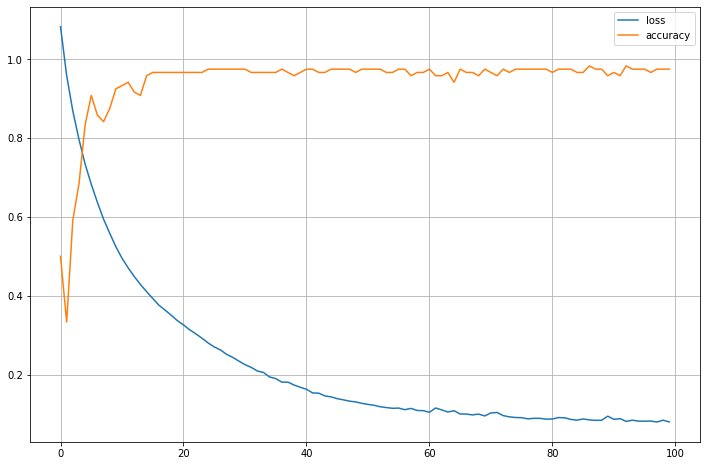

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [6]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("정확도 = {:.2f}".format(accuracy))

정확도 = 1.00


In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
pred_class = np.argmax(pred, axis=1)
print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class, pred_class))

[1 0 1 2 1 2 0 2 2 0]
[1 0 1 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [8]:
model.save("/Users/ian/Desktop/Study/data/iris/iris_keras.model")

2021-12-24 15:58:34.726872: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/ian/Desktop/Study/data/iris/iris_keras.model/assets
